In [23]:
%matplotlib inline

In [20]:
exec(open('./load_packages.py'))

In [2]:
exec(open('./codes/dataset.py'))

In [3]:
n2068_Q_f = '../../../Data/jcmt_gdpol/scupollegacy_n2068_Q.fits'
n2068_U_f = '../../../Data/jcmt_gdpol/scupollegacy_n2068_U.fits'
n2068_pa_f = '../../../Data/jcmt_gdpol/scupollegacy_n2068_pa.fits'

n2068_vg_f = '../../../Data/n2068_fegd.fits'

In [4]:
n2068_Q_c = dataset(n2068_Q_f)
n2068_U_c = dataset(n2068_U_f)
n2068_p_c = dataset(n2068_pa_f)
n2068_v_c = dataset(n2068_vg_f,vg=True)

In [11]:
n2068_Q = n2068_Q_c.get_data()
n2068_U = n2068_U_c.get_data()
n2068_p = n2068_p_c.get_data()
n2068_v = n2068_v_c.get_data()

In [87]:
exec(open('./codes/util.py'))
exec(open('./codes/computation.py'))

In [21]:
n2068_px, n2068_py = plot_quiver(n2068_p)
n2068_vx, n2068_vy = plot_quiver(n2068_v)

n2068_E, n2068_B, n2068_Epsd, n2068_Bpsd = QU_to_EB(n2068_Q,n2068_U)
n2068_vE, n2068_vB, n2068_vEp, n2068_vBp = xy_to_EB(n2068_vx,n2068_vy)

./codes/radialprofile.py:74: RuntimeWarning: invalid value encountered in divide
  radial_prof = np.histogram(r, bins, weights=(image*weights*mask))[0] / np.histogram(r, bins, weights=(mask*weights))[0]


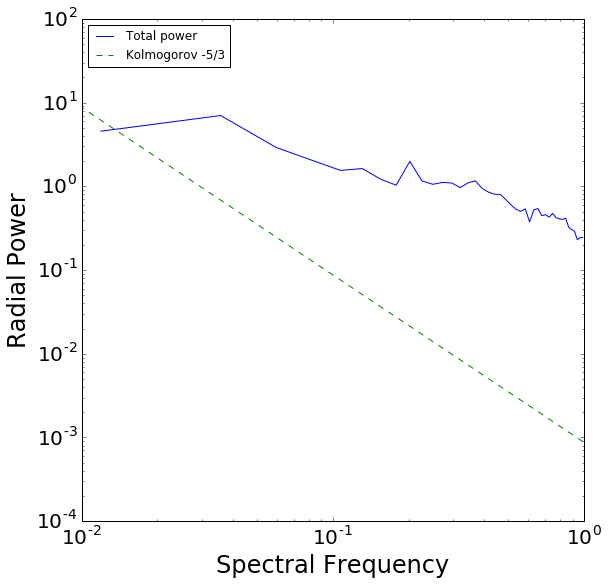

In [24]:
p_tot, p_tpsd = tot_spec(n2068_E,n2068_B,plot=True)
plt.legend(loc='upper left')

In [76]:
exec(open('./codes/noise_gen.py'))
exec(open('./codes/plot_fit.py'))

/Library/Python/2.7/site-packages/ipykernel/__main__.py:116: RuntimeWarning: invalid value encountered in divide


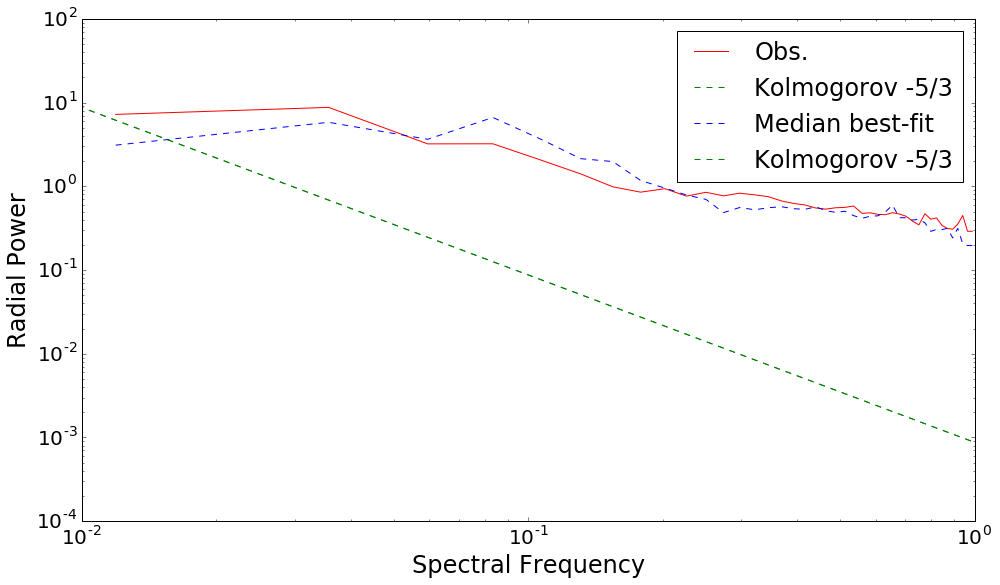

In [77]:
plt.figure(figsize=(16,9))
ww = np.array([0.31,0.37,0.32])
fit_out(ww,data=n2068_p,label='Median best-fit',style='b--')


In [79]:
data_p = (n2068_Q,n2068_U)
data_v = n2068_p

In [88]:
evid(N_samples=100)

sampling...: 0


/Library/Python/2.7/site-packages/ipykernel/__main__.py:116: RuntimeWarning: invalid value encountered in divide


(50.493783152275839,
 91.605347527548318,
 0.95718928300510775,
 0.96271703652642615)

In [111]:
exec(open('./codes/mcmc.py'))

### full - chi

In [92]:
w = [lmc.Parameter(0.3, 1e-2, 'oct.-2'), lmc.Parameter(0.3, 1e-2, 'oct.-8')]
prspace_v = lmc.ParameterSpace([w[0],w[1]], log_post_v_chi)

In [94]:
data_v = n2068_p

Nchains = 1
Nsteps = 10
chains = [lmc.dictBackend() for j in range(Nchains)]
for ch in chains:
    v = lmc.Vehicle(prspace_v, ch)
    %time v(1,Nsteps)

CPU times: user 1min 19s, sys: 672 ms, total: 1min 20s
Wall time: 1min 22s


/Library/Python/2.7/site-packages/ipykernel/__main__.py:116: RuntimeWarning: invalid value encountered in divide


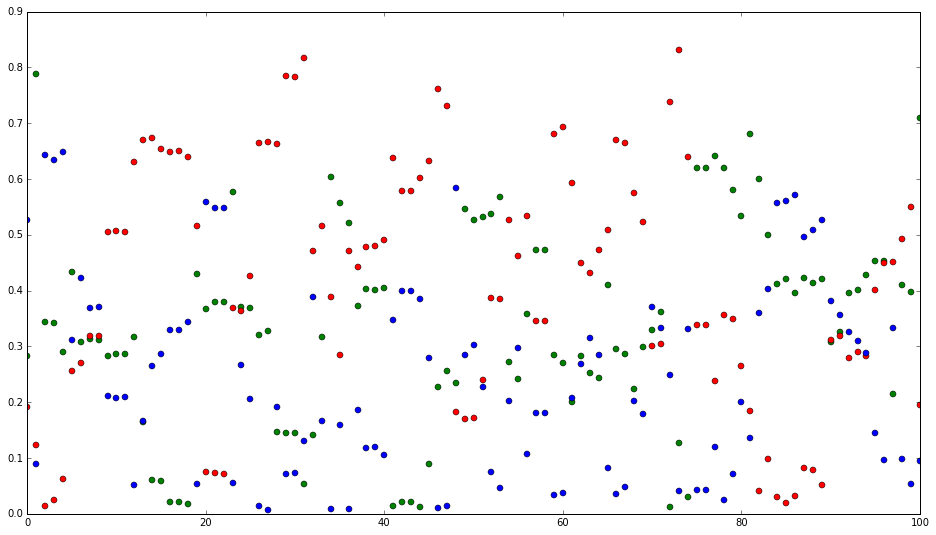

In [95]:
plt.figure(figsize=(16,9))
for ch in chains:
    plt.plot(ch['oct.-2'], 'go', ms=6.0,label='Small')
    plt.plot(ch['oct.-8'], 'ro', ms=6.0,label='Medium')
    plt.plot(np.ones(len(ch['oct.-2'])) - ch['oct.-8'] -ch['oct.-2'], 'bo', ms=6.0,label='Large (dependent)')

In [96]:
w = [lmc.Parameter(0.3, 1e-2, 'oct.-2'), lmc.Parameter(0.3, 1e-2, 'oct.-8')]

prspace_p = lmc.ParameterSpace([w[0],w[1]], log_post_p_chi)

In [97]:
data_p = n2068_Q,n2068_U

Nchains = 1
Nsteps = 10
chains = [lmc.dictBackend() for j in range(Nchains)]
for ch in chains:
    v = lmc.Vehicle(prspace_p, ch)
    %time v(1,Nsteps)

CPU times: user 1min 25s, sys: 800 ms, total: 1min 26s
Wall time: 1min 27s


/Library/Python/2.7/site-packages/ipykernel/__main__.py:116: RuntimeWarning: invalid value encountered in divide


### noise free - chi

In [98]:
w = [lmc.Parameter(0.3, 1e-2, 'oct.-2'), lmc.Parameter(0.3, 1e-2, 'oct.-8')]
prspace_v = lmc.ParameterSpace([w[0],w[1]], log_post_v_chi_fixseed)

Nchains = 1
Nsteps = 10
chains = [lmc.dictBackend() for j in range(Nchains)]
for ch in chains:
    v = lmc.Vehicle(prspace_v, ch)
    %time v(1,Nsteps)

CPU times: user 56.5 s, sys: 467 ms, total: 57 s
Wall time: 57.7 s


/Library/Python/2.7/site-packages/ipykernel/__main__.py:116: RuntimeWarning: invalid value encountered in divide


In [107]:
w = [lmc.Parameter(0.3, 1e-2, 'oct.-2'), lmc.Parameter(0.3, 1e-2, 'oct.-8')]
prspace_p = lmc.ParameterSpace([w[0],w[1]], log_post_p_chi_fixseed)

data_p = n2068_Q,n2068_U

Nchains = 1
Nsteps = 10
chains = [lmc.dictBackend() for j in range(Nchains)]
for ch in chains:
    v = lmc.Vehicle(prspace_p, ch)
    %time v(1,Nsteps)

CPU times: user 46.2 s, sys: 285 ms, total: 46.4 s
Wall time: 46.8 s


/Library/Python/2.7/site-packages/ipykernel/__main__.py:116: RuntimeWarning: invalid value encountered in divide


### noiseless - chi

In [106]:
w = [lmc.Parameter(0.3, 1e-2, 'oct.-2'), lmc.Parameter(0.3, 1e-2, 'oct.-8')]
prspace_v = lmc.ParameterSpace([w[0],w[1]], log_post_v_chi_noiseless)

Nchains = 1
Nsteps = 10
chains = [lmc.dictBackend() for j in range(Nchains)]
for ch in chains:
    v = lmc.Vehicle(prspace_v, ch)
    %time v(1,Nsteps)

CPU times: user 1min 7s, sys: 495 ms, total: 1min 7s
Wall time: 1min 8s


/Library/Python/2.7/site-packages/ipykernel/__main__.py:116: RuntimeWarning: invalid value encountered in divide


In [108]:
w = [lmc.Parameter(0.3, 1e-2, 'oct.-2'), lmc.Parameter(0.3, 1e-2, 'oct.-8')]
prspace_p = lmc.ParameterSpace([w[0],w[1]], log_post_p_chi_noiseless)

data_p = n2068_Q,n2068_U

Nchains = 1
Nsteps = 10
chains = [lmc.dictBackend() for j in range(Nchains)]
for ch in chains:
    v = lmc.Vehicle(prspace_p, ch)
    %time v(1,Nsteps)

CPU times: user 1min 13s, sys: 309 ms, total: 1min 14s
Wall time: 1min 14s


/Library/Python/2.7/site-packages/ipykernel/__main__.py:116: RuntimeWarning: invalid value encountered in divide


## CSD - noisy

In [112]:
w = [lmc.Parameter(0.3, 1e-2, 'oct.-2'), lmc.Parameter(0.3, 1e-2, 'oct.-8')]
prspace_v = lmc.ParameterSpace([w[0],w[1]], log_post_v_csd)

Nchains = 1
Nsteps = 10
chains = [lmc.dictBackend() for j in range(Nchains)]
for ch in chains:
    v = lmc.Vehicle(prspace_v, ch)
    %time v(1,Nsteps)

CPU times: user 52.6 s, sys: 229 ms, total: 52.8 s
Wall time: 53 s


/Library/Python/2.7/site-packages/ipykernel/__main__.py:116: RuntimeWarning: invalid value encountered in divide


In [113]:
w = [lmc.Parameter(0.3, 1e-2, 'oct.-2'), lmc.Parameter(0.3, 1e-2, 'oct.-8')]
prspace_p = lmc.ParameterSpace([w[0],w[1]], log_post_p_csd)

data_p = n2068_Q,n2068_U

Nchains = 1
Nsteps = 10
chains = [lmc.dictBackend() for j in range(Nchains)]
for ch in chains:
    v = lmc.Vehicle(prspace_p, ch)
    %time v(1,Nsteps)

CPU times: user 54.4 s, sys: 214 ms, total: 54.6 s
Wall time: 54.8 s


/Library/Python/2.7/site-packages/ipykernel/__main__.py:116: RuntimeWarning: invalid value encountered in divide
